In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
# riotwatcher is a wrapper for riot api
from riotwatcher import LolWatcher, ApiError
import time

count = 1
start = time.time()
# incrementlimiter is a function to be call every time a request is made
# this ensures we follow riot's rate limits (100 requests every 2 minutes)
def incrementlimiter():
    global count
    global start
    print(count)
    count = count + 1
    if count > 100:
        count = 1
        if time.time()-start<120:
            timetosleep = 130-(time.time()-start)
            time.sleep(timetosleep)
        start = time.time()

# developer api key
lol_watcher = LolWatcher('RGAPI-6cda35c7-1597-4400-8e60-946b7bfac508')

my_region = 'na1'

# output display options 
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns = None

# gets list of champions and their indexes
current_champ_list = lol_watcher.data_dragon.champions('12.5.1')
champlist = list(current_champ_list['data'].keys())

# returns top 300 players in north america
challenger_stats = lol_watcher.league.challenger_by_queue(my_region, 'RANKED_SOLO_5x5')


# grandmaster_stats = lol_watcher.league.grandmaster_by_queue(my_region, 'RANKED_SOLO_5x5')
match_stats = lol_watcher.match.by_id('AMERICAS','NA1_4249909973')
incrementlimiter()

# return the match list of a player
matchlist = lol_watcher.match.matchlist_by_puuid('AMERICAS','M77YzWnUN-qUeHWWTWBmkifkgnR2QAGdwKKrGF5bdWhrTf9YABpQeIle_pwOPedyf-EXiit1oD7sng',0,100,420,'ranked')
incrementlimiter()

1
2


In [2]:
# displaying the details of the dictionary array returned from the riotwatcher module
# riot api returns information in json formate but riotwatcher helps us convert it into python dictionary arrays
df = pd.DataFrame.from_dict(challenger_stats)
df

,tier,leagueId,queue,name,entries
0,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': '-ktnnNmBsyLloeapbb9Z6rmKv72TlTAb4S_khWkMM8FyzXk', 'summonerName': 'relentless1', 'leaguePoints': 731, 'rank': 'I', 'wins': 486, 'losses': 465, 'veteran': False, 'inactive': False, 'freshBlood': True, 'hotStreak': False}"
1,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': '2lY-cHOwZUj0Xf9oAdiWF7WYBdRxcJF-ROzuoqKqpoApvzc', 'summonerName': 'ÒmÓ', 'leaguePoints': 720, 'rank': 'I', 'wins': 121, 'losses': 93, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': True}"
2,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': '8Ii6PlPFw09h34lRvSJM13_BcsUrYWb98Z3x7bcm-nZeJmdr5v8XAkxAHg', 'summonerName': 'xusty', 'leaguePoints': 738, 'rank': 'I', 'wins': 124, 'losses': 105, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}"
3,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': 'qbhqzzctGP24GpjgG4LaDJVA92bkvdnS48NEkiqjVA2u2HY', 'summonerName': 'actxr', 'leaguePoints': 878, 'rank': 'I', 'wins': 170, 'losses': 131, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}"
4,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': '1ATorZR_-aDusvPfw74mRa_-XmaLohmjhvyoAI1tokWCRq-Kl1iFI9_IiA', 'summonerName': 'WAAQAAEAA', 'leaguePoints': 751, 'rank': 'I', 'wins': 194, 'losses': 152, 'veteran': False, 'inactive': False, 'freshBlood': True, 'hotStreak': False}"
...,...,...,...,...,...
295,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': 'D8JT6PQko2r0qEDfy63hHwvVLklVnk8H0RSoAUmtif8ORvA', 'summonerName': 'DARK WlNGS', 'leaguePoints': 936, 'rank': 'I', 'wins': 107, 'losses': 83, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}"
296,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': '-ncGB_ewpIcHZA-wpsUUdQk8JV88GgEunW6UxbRF0rePEI070beZWegL7w', 'summonerName': 'No help no carry', 'leaguePoints': 744, 'rank': 'I', 'wins': 110, 'losses': 96, 'veteran': False, 'inactive': False, 'freshBlood': True, 'hotStreak': True}"
297,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': 'mWOgNslXWtRtkECLnIiWaLN1kjf9FUKX1_ISuwmsHk9nWYg', 'summonerName': 'kisno', 'leaguePoints': 948, 'rank': 'I', 'wins': 163, 'losses': 133, 'veteran': True, 'inactive': False, 'freshBlood': False, 'hotStreak': False}"
298,CHALLENGER,d609d862-7a3f-3f35-8c18-1fbc8198f70a,RANKED_SOLO_5x5,Swain's Villains,"{'summonerId': 'MwWVZmNi-vR3cpl2AoEYJUlkvwlj0pY0N_l4vEIDeinBuec', 'summonerName': 'Doxa', 'leaguePoints': 1107, 'rank': 'I', 'wins': 168, 'losses': 128, 'veteran': True, 'inactive': False, 'freshBlood': False, 'hotStreak': True}"


In [4]:
df = pd.DataFrame.from_dict(challenger_stats["entries"])

# Current entries are not sorted by player ranking
# Sort the rows by the leaguePoints to display current the leaderboard
df = df.sort_values(by=['leaguePoints'],ascending=False)
df

,summonerId,summonerName,leaguePoints,rank,wins,losses,veteran,inactive,freshBlood,hotStreak
108,izFJeBQyLQ0eIcZj_8WKTFBolziLvp63bxHp8YTZezsEQDgljKllFJmEqg,TwtchTV Sheiden,1618,I,166,120,True,False,False,True
254,Hs8tTX-lfipHxAE8Lu53IfxIwv8Y5F04ITyS1bpRdXwGVu4,Sheiden,1616,I,151,93,False,False,True,False
15,MK_3PDOFPow4IGzgAY5-x3RdgYXt4QyDlBXodTnS7F6uA1Si,Shrimp Cpt,1587,I,269,227,True,False,False,False
202,Ojm0Oqcu1x4AQEXDGqG-5trjzZaARU5pk9DzVDhJe4ffcos,rallyracer21,1567,I,187,130,True,False,False,True
216,4ajV_ysJlM6hM-3m8rBYHccnAHks5DIDPAmFOCRVpmFgLTQ,no invade pls,1521,I,235,190,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
280,8GuLU2CTA9XHRyp3k9351nikKTU7ZWGHK-Iwu1PzjEUDKL2P,melke,694,I,266,249,False,False,True,False
30,S_yBOlvsYnkIONN_WksAKaL-rNO2GwhRmJ8P9oO9mg,Pobelter,693,I,167,160,True,False,False,False
52,JAPAdBAfV6j_SBsr2U3A9DRCuKqGcw8Gygy0nuwmxOkIJqE,Kind Jungle,688,I,199,185,True,False,False,False
148,Tb0HEFvtjlXB9jwU-Du2dIrEa8xrVpDEX7ARsS-ybC1A0gBy,Spooky,678,I,201,186,True,False,False,False


In [5]:
# match data from a single game
df2 = pd.DataFrame.from_dict(match_stats)
df2

metadata  \
dataVersion                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        2   
matchId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               NA1_4249909973   
participants        [LVzoOGnQN-SjsZ7if3ISKzrpJOGyf8kyWYEl8PGKpkz2QPxvvhRDplpicFvXxDCP-A0JyP6YxJqi3Q, xx3InF6heJPdpTsOyhLcaATlmWcRcmMeW7tSFhrQlOleScTL9lJ4n3CJb4bmkP2VpGckZqGAsRIaGA, UxWFOVH-BsX_BW_7hX_LI2y1XdlVeoieEX5ji7uHWOIelZAdjClzq0cbQqdc4miOko-Jasv3Bjg8Nw, UoRX9GTimHKIZYKaJnG3AvLe_sOQsDuO3vQKmySg-WDkyP-4u_Lb3POHAz3aug9mVCCaFnSIouOu8Q, kd9XXuWlgC8iRiYqj0mFMSPK5ypPFHvQVggWvZ55e_1D4IKRtzwQ529o-7bJgs03QZtOONH52IIu0A, apBFzz76eONpZuN2QKBsJAffOotbFP_I_pYgHu_r4qtw_ilI8H5yZCJQr3kT-4yFRMCt65tCGNqXIg, XIR3YN-aRw-4z3IAlfz0AuaU5K2sNFg5BwKcNhSRuyJqqnLrEg3kCtB0JvllgUcWJ3gMCE4dC5Gvdw, M77YzWnUN-qUeHWWTWBmkifkgnR2QAGdwKKrGF5bdWhrTf9YABpQeIle_pwOPedyf-EXiit1oD7sng, A7of1PrTfsJrOL8LelHx5Qaqhm6KTiuEUl4xs9ecNudGQyBzEiF5-b1TzHLljBxvO8ZgI0SoJypsTg, 3hqlEEtyY_swTM996oGYWYx5Nkovqfw0WRYsG8JXVXPU73MsjGuIpjPukDht9BKWjDy_s83-oO1rPQ]   
gameCreation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     NaN   
gameDuration                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [11]:
# metadata contains the basics data such as summoner and match ids
df2metadata = pd.DataFrame.from_dict(match_stats['metadata'])
df2metadata

,dataVersion,matchId,participants
0,2,NA1_4249909973,LVzoOGnQN-SjsZ7if3ISKzrpJOGyf8kyWYEl8PGKpkz2QPxvvhRDplpicFvXxDCP-A0JyP6YxJqi3Q
1,2,NA1_4249909973,xx3InF6heJPdpTsOyhLcaATlmWcRcmMeW7tSFhrQlOleScTL9lJ4n3CJb4bmkP2VpGckZqGAsRIaGA
2,2,NA1_4249909973,UxWFOVH-BsX_BW_7hX_LI2y1XdlVeoieEX5ji7uHWOIelZAdjClzq0cbQqdc4miOko-Jasv3Bjg8Nw
3,2,NA1_4249909973,UoRX9GTimHKIZYKaJnG3AvLe_sOQsDuO3vQKmySg-WDkyP-4u_Lb3POHAz3aug9mVCCaFnSIouOu8Q
4,2,NA1_4249909973,kd9XXuWlgC8iRiYqj0mFMSPK5ypPFHvQVggWvZ55e_1D4IKRtzwQ529o-7bJgs03QZtOONH52IIu0A
5,2,NA1_4249909973,apBFzz76eONpZuN2QKBsJAffOotbFP_I_pYgHu_r4qtw_ilI8H5yZCJQr3kT-4yFRMCt65tCGNqXIg
6,2,NA1_4249909973,XIR3YN-aRw-4z3IAlfz0AuaU5K2sNFg5BwKcNhSRuyJqqnLrEg3kCtB0JvllgUcWJ3gMCE4dC5Gvdw
7,2,NA1_4249909973,M77YzWnUN-qUeHWWTWBmkifkgnR2QAGdwKKrGF5bdWhrTf9YABpQeIle_pwOPedyf-EXiit1oD7sng
8,2,NA1_4249909973,A7of1PrTfsJrOL8LelHx5Qaqhm6KTiuEUl4xs9ecNudGQyBzEiF5-b1TzHLljBxvO8ZgI0SoJypsTg
9,2,NA1_4249909973,3hqlEEtyY_swTM996oGYWYx5Nkovqfw0WRYsG8JXVXPU73MsjGuIpjPukDht9BKWjDy_s83-oO1rPQ


In [14]:
# orient='index' because the keys are the rows instead of the column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
df2info = pd.DataFrame.from_dict(match_stats['info'], orient='index')
df2info

,0
gameCreation,1647569974000
gameDuration,2127
gameEndTimestamp,1647572118036
gameId,4249909973
gameMode,CLASSIC
gameName,teambuilder-match-4249909973
gameStartTimestamp,1647569990588
gameType,MATCHED_GAME
gameVersion,12.5.425.9171
mapId,11


In [15]:
# Most of the important information is stored in the 'participants' array
df2infoparticipants = pd.DataFrame.from_dict(match_stats['info']['participants'])
df2infoparticipants 

,assists,baronKills,bountyLevel,challenges,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,detectorWardsPlaced,doubleKills,dragonKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,goldSpent,individualPosition,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,killingSprees,kills,lane,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,neutralMinionsKilled,nexusKills,nexusLost,nexusTakedowns,objectivesStolen,objectivesStolenAssists,participantId,pentaKills,perks,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,profileIcon,puuid,quadraKills,riotIdName,riotIdTagline,role,sightWardsBoughtInGame,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,summonerLevel,summonerName,teamEarlySurrendered,teamId,teamPosition,timeCCingOthers,timePlayed,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,3,0,0,"{'12AssistStreakCount': 0, 'abilityUses': 336, 'acesBefore15Minutes': 0, 'alliedJungleMonsterKills': 6, 'baronTakedowns': 0, 'blastConeOppositeOpponentCount': 0, 'bountyGold': 150, 'buffsStolen': 0, 'completeSupportQuestInTime': 0, 'controlWardTimeCoverageInRiverOrEnemyHalf': 0.007438244761435203, 'controlWardsPlaced': 1, 'damagePerMinute': 3832.519367529308, 'damageTakenOnTeamPercentage': 0.18078456392312325, 'dancedWithRiftHerald': 0, 'deathsByEnemyChamps': 8, 'dodgeSkillShotsSmallWindow': 214, 'doubleAces': 0, 'dragonTakedowns': 2, 'earliestDragonTakedown': 1755.9403985493473, 'earlyLaningPhaseGoldExpAdvantage': -0.22983789443969727, 'effectiveHealAndShielding': 0, 'elderDragonKillsWithOpposingSoul': 0, 'elderDragonMultikills': 0, 'enemyChampionImmobilizations': 0, 'enemyJungleMonsterKills': 0, 'epicMonsterKillsNearEnemyJungler': 0, 'epicMonsterKillsWithin30SecondsOfSpawn': 0, 'epicMonsterSteals': 0, 'epicMonsterStolenWithoutSmite': 0, 'firstTurretKilledTime': 879.9171535122067, 'flawlessAces': 0, 'fullTeamTakedown': 0, 'gameLength': 2127.4880256525275, 'getTakedownsInAllLanesEarlyJungleAsLaner': 0, 'goldPerMinute': 341.0560470851307, 'hadAfkTeammate': 0, 'hadOpenNexus': 0, 'immobilizeAndKillWithAlly': 0, 'initialBuffCount': 0, 'initialCrabCount': 0, 'jungleCsBefore10Minutes': 0, 'junglerKillsEarlyJungle': 0, 'junglerTakedownsNearDamagedEpicMonster': 0, 'kTurretsDestroyedBeforePlatesFall': 0, 'kda': 1.125, 'killAfterHiddenWithAlly': 0, 'killParticipation': 0.3333333333333333, 'killedChampTookFullTeamDamageSurvived': 0, 'killsNearEnemyTurret': 0, 'killsOnLanersEarlyJungleAsJungler': 0, 'killsOnOtherLanesEarlyJungleAsLaner': 0, 'killsOnRecentlyHealedByAramPack': 0, 'killsUnderOwnTurret': 6, 'killsWithHelpFromEpicMonster': 0, 'knockEnemyIntoTeamAndKill': 0, 'landSkillShotsEarlyGame': 1, 'laneMinionsFirst10Minutes': 64, 'laningPhaseGoldExpAdvantage': -0.23792827129364014, 'legendaryCount': 0, 'lostAnInhibitor': 0, 'maxCsAdvantageOnLaneOpponent': 6, 'maxKillDeficit': 0, 'maxLevelLeadLaneOpponent': 1, 'moreEnemyJungleThanOpponent': -109.00000005960464, 'multiKillOneSpell': 0, 'multiTurretRiftHeraldCount': 0, 'multikills': 1, 'multikillsAfterAggressiveFlash': 0, 'mythicItemUsed': 6655, 'outerTurretExecutesBefore10Minutes': 0, 'outnumberedKills': 2, 'outnumberedNexusKill': 0, 'perfectDragonSoulsTaken': 0, 'perfectGame': 0, 'pickKillWithAlly': 0, 'poroExplosions': 0, 'quickCleanse'

In [16]:
# As we can see in the previous example,
# the 'challenges' and 'perks' colummns are storing arrays instead of numerical or string values
# we can simply remove these columns as they have little value/effect on the game
# we create a new dictionary array object to store the new array so we can retain the original data. 
newDictionary = match_stats['info']['participants'].copy()
for i in newDictionary:
    i.pop("challenges", None)
    i.pop("perks", None)

df2infoparticipantschallenges = pd.DataFrame.from_dict(newDictionary)
df2infoparticipantschallenges
# The table finally appears cleanly showing the attributes of each of the 10 players in the game
# it contains all the important data needed to build our model

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,detectorWardsPlaced,doubleKills,dragonKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,goldSpent,individualPosition,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,killingSprees,kills,lane,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,neutralMinionsKilled,nexusKills,nexusLost,nexusTakedowns,objectivesStolen,objectivesStolenAssists,participantId,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,profileIcon,puuid,quadraKills,riotIdName,riotIdTagline,role,sightWardsBoughtInGame,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,summonerLevel,summonerName,teamEarlySurrendered,teamId,teamPosition,timeCCingOthers,timePlayed,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,3,0,0,16585,17,145,Kaisa,0,3,345,3472,345,16838,8,1,1,0,False,False,False,False,False,False,12093,11700,TOP,0,0,1,3042,6655,4645,1026,1055,3020,3363,65,2,6,TOP,0,3,2,522,31309,15142,4849,9,0,1,0,0,0,1,0,103534,10695,15123,4661,LVzoOGnQN-SjsZ7if3ISKzrpJOGyf8kyWYEl8PGKpkz2QPxvvhRDplpicFvXxDCP-A0JyP6YxJqi3Q,0,,,SOLO,0,91,81,149,15,6,14,5,4,qmkjI0NGREmMXP2jryBBamjaP3zC8s_aQwHjci0ZJnjS-Jo,288,xRoyal,False,100,TOP,0,2127,135893,26888,0,22537,3149,0,183,0,221,1,0,1049,1049,2564,0,0,8,0,24,2,3,16,False
1,6,0,0,15932,16,245,Ekko,0,5,6489,36438,6489,25727,7,5,1,2,False,False,False,False,False,False,15138,14860,JUNGLE,0,0,1,3152,3157,1052,3100,3089,3020,3364,27,3,8,JUNGLE,0,3,2,658,195610,16210,15116,159,0,1,0,0,0,2,0,28270,2073,24047,6,xx3InF6heJPdpTsOyhLcaATlmWcRcmMeW7tSFhrQlOleScTL9lJ4n3CJb4bmkP2VpGckZqGAsRIaGA,0,,,NONE,0,110,32,87,10,19,11,5,4,dhT4_tWyz2NX34xsCxlAE9SNgXn6va_16tmS1bR9xlQ-tbv7XKtsTfw1uA,58,03 14 2022,False,100,JUNGLE,23,2127,242238,19692,0,40221,10131,0,74,474,254,1,0,18357,1407,1057,3,4,8,0,42,5,11,7,False
2,4,0,0,17175,17,157,Yasuo,0,3,1175,6629,1175,28715,6,0,2,0,False,False,False,False,False,False,14943,13475,MIDDLE,0,0,1,6333,3006,6673,2421,3031,1037,3363,26,1,7,MIDDLE,1567,7,2,546,11112,875,5906,6,0,1,0,0,0,3,0,193355,10926,12231,17,UxWFOVH-BsX_BW_7hX_LI2y1XdlVeoieEX5ji7uHWOIelZAdjClzq0cbQqdc4miOko-Jasv3Bjg8Nw,0,,,SOLO,0,262,11,114,2,6,14,5,4,BHiPGRxq9zsUk3LKS6Kd8S87-joqCHiMmTOoXpcXFb-zjvj5,120,zcxc,False,100,MIDDLE,15,2127,213186,13175,0,22462,1163,0,264,108,199,1,0,8718,1374,4323,1,2,8,0,15,0,2,12,False
3,3,0,0,14191,15,202,Jhin,0,8,0,3079,0,11648,4,4,0,0,False,False,False,False,False,False,12722,11670,BOTTOM,0,0,1,3094,6671,1018,3031,1036,3009,3363,23,1,2,BOTTOM,1484,2,1,1326,11522,2474,10855,19,0,1,0,0,0,4,0,214913,15975,12539,7,UoRX9GTimHKIZYKaJnG3AvLe_sOQsDuO3vQKmySg-WDkyP-4u_Lb3POHAz3aug9mVCCaFnSIouOu8Q,0,,,CARRY,0,97,46,42,30,4,4,4,3,nejs7hPAgTxL_rk9-MVIkrtMZRxsXpNgTXUKqgjGnuMQm8Sz,294,happy game,False,100,BOTTOM,22,2127,227075,18769,0,24335,2661,0,289,147,132,1,0,640,320,941,0,0,8,0,28,4,6,12,False
4,14,0,0,10915,13,16,Soraka,0,14,372,695,372,6872,2,11,0,0,False,False,False,False,False,False,8277,7925,UTILITY,0,0,1,3107,0,6617,3158,3853,3916,3364,29,0,0,BOTTOM,0,0,0,1636,13063,4482,7771,0,0,1,0,0,0,5,0,4777,481,6744,5254,kd9XXuWlgC8iRiYqj0mFMSPK5ypPFHvQVggWvZ55e_1D4IKRtzwQ529o-7bJgs03QZtOONH52IIu0A,0,,,SUPPORT,0,109,53,36,11,4,4,6,7,2Fent4FbFs5TuRQ4J3fXyLnS71xutfSwwY8tyRf-ja8e

In [ ]:
# collects the match ids of ~600 of the top 300 players in north america
# rate limiting prevents us from collecting more data
count = 1
start = time.time()

fullmatchlist = []
for i in challenger_stats["entries"]:
    puuid = lol_watcher.summoner.by_id(my_region, i["summonerId"])["puuid"]
    incrementlimiter()
    # Should not be pass 100 games as games can expire before after being retrieved 
    # collects past 10 games of each player
    matchlisttemp = lol_watcher.match.matchlist_by_puuid('AMERICAS',puuid,0,10,420,'ranked')
    incrementlimiter()
    for word in matchlisttemp:
        # does not add matches which are already in the list
        if word not in fullmatchlist:
            fullmatchlist.append(word)
print(len(fullmatchlist))

In [ ]:
count = 1
start = time.time()

# the requests can return errors sometimes, we must handle these errors
def getmatch():
    try:
        itmatch = lol_watcher.match.by_id('AMERICAS', x)['info']['participants'].copy()
        incrementlimiter()
        return itmatch
    except ApiError as err:
        if err.response.status_code == 429:
            print('We should retry in {} seconds.'.format(err.response.headers['Retry-After']))
            print('this retry-after is handled by default by the RiotWatcher library')
            print('future requests wait until the retry-after time passes')
        elif err.response.status_code == 404:
            print('Bad request')
        else:
            raise
    return 0

    
matches = []
# Requesting the match details of the ~600 matches collected
for x in fullmatchlist:
    itmatch = getmatch()
    if itmatch==0:
        continue
    for i in itmatch:
        i.pop("challenges", None)
        i.pop("perks", None)
    matches.append(itmatch)

df3 = pd.DataFrame.from_dict(matches)

In [18]:
# save and load the match details in the current directory
# np.save('data.npy', matches)
matches = np.load('data.npy',  allow_pickle=True)

In [19]:
# here I have combined the attributes of each player from each of the ~600 matches into a single array
championlist = []
for i in matches:
    for j in i:
        championlist.append(j)
df5 = pd.DataFrame.from_dict(championlist)
df5

,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,detectorWardsPlaced,doubleKills,dragonKills,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,goldSpent,individualPosition,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,killingSprees,kills,lane,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,neutralMinionsKilled,nexusKills,nexusLost,nexusTakedowns,objectivesStolen,objectivesStolenAssists,participantId,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,profileIcon,puuid,quadraKills,riotIdName,riotIdTagline,role,sightWardsBoughtInGame,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,summonerLevel,summonerName,teamEarlySurrendered,teamId,teamPosition,timeCCingOthers,timePlayed,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,5,0,0,15040,16,82,Mordekaiser,0,4,4431,27236,4431,67330,5,0,3,0,False,False,False,True,False,False,16450,15100,TOP,0,0,1,3065,4633,3111,3116,4637,3076,3363,24,4,15,TOP,2,6,2,1090,132985,27747,12290,10,0,1,0,0,0,1,0,16778,2804,28005,4403,eeF-DeErf8ofUKcKvk829ICTJo9bRi2DSMDpXd105W0AQpPa8tX41lg1a-3VbzC3qvOOF0g9aM0Uig,0,,,SOLO,0,151,57,66,12,4,4,7,14,xbOdE_nY_NqlGDYypARvn_dORg59b3bxD4dV0ac5dJcoP1E,741,Cylainius,False,100,TOP,27,2220,171000,37733,0,43941,8251,0,160,256,184,1,0,21237,7182,3646,1,2,7,0,14,0,2,10,False
1,9,1,0,15333,16,203,Kindred,0,2,736,28561,736,30167,10,2,0,3,False,False,True,False,False,False,13640,13575,JUNGLE,1,1,1,6671,1037,6333,6676,1018,3111,3364,25,2,6,JUNGLE,530,2,1,385,31497,5105,12750,143,0,1,0,0,0,2,0,131354,14971,16372,18,Zh5iAA0LsDCjFsJx9c9e_k0wI2s3DCHl4vtvYraHw4Ognvh0vofRq9lSFhV3R2w7HRWjBwXFyzTQ6g,0,,,NONE,0,203,61,35,5,4,4,19,11,8gCQfA_tV_nm2RokoqcP0o_a_83bt5FkaIQj0edQfzw0g8Y,539,Wynncraftian,False,100,JUNGLE,3,2220,181139,21347,0,31295,12505,3243,67,146,371,11,0,18287,1270,2171,1,4,7,0,43,2,11,3,False
2,20,0,0,13367,15,16,Soraka,0,5,787,2747,787,19323,8,3,0,0,False,False,False,False,False,False,10132,9075,MIDDLE,0,0,1,2421,3067,1011,3158,6617,3040,3363,25,0,0,MIDDLE,0,0,0,819,51536,6505,12221,5,0,1,0,0,0,3,0,14521,1520,11468,4659,F0T21Cb37d0gm_XNhov1IhWsYBYwwjISt0eGJnFGWzlwdjLWHfrsVw-8IO5bfs9e3iZpvOpSk16Mlg,0,,,SOLO,0,143,41,32,14,6,4,4,3,U3MIbcm6VPnObX_rfk1cjru8PqPI--iOTwGPLccYabu-tJ8,687,Gojo Wakana,False,100,MIDDLE,35,2220,69109,8357,2463,24336,31138,21982,140,290,319,5,0,3051,331,646,0,2,7,0,40,3,5,14,False
3,12,0,0,15200,16,221,Zeri,0,7,6668,15792,6668,20371,6,3,1,1,False,False,False,False,False,False,14283,13208,BOTTOM,0,1,1,3078,2420,3133,3153,3006,3748,3363,29,1,4,BOTTOM,0,2,2,507,40634,9570,14104,44,0,1,0,0,0,4,0,158262,15159,17078,538,sM0fNvX6Cj4z87cV832MpbDC2FvuF14GbR3RLOQSszrOcc1qsLBve0Ub4t-M86-Ej4SVBhaMkaWfLQ,0,,,CARRY,0,804,82,50,13,4,4,7,7,5vkYeJtGP9Al1eckao5UE_DzBe-6v0JqhR_CxaNJtFz3OnE,280,l7l,False,100,BOTTOM,11,2220,230529,25363,0,32493,4341,741,221,208,215,4,0,31633,633,1309,3,3,7,0,58,3,12,17,False
4,13,0,0,11674,14,101,Xerath,0,3,941,1948,941,13505,9,1,0,0,False,False,True,False,False,False,11759,10885,UTILITY,0,1,1,6655,4645,3135,3853,0,3020,3364,23,2,5,BOTTOM,0,2,1,441,73730,26222,8193,13,0,1,0,0,0,5,0,4782,803,10579,3539,IxaqoT1rtG-Sm3aueGORRHWpfycc9iLXuevqxLsGZMg1S_-kJv5nK99dEEYzAVUZ3rmwDuhwdxAZkg,0,,,SUPPORT,0,103,55,42,35,7,14,4,4,giwA1hpcnLvSy

<AxesSubplot:xlabel='kills', ylabel='goldEarned'>

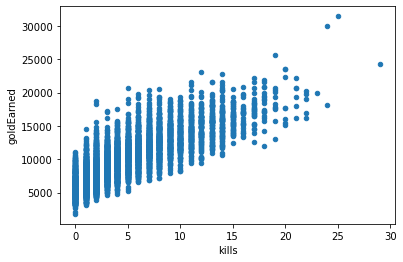

In [20]:
# We can analyse the relationship between different variables across every player from each game
df5.plot(kind='scatter',x='kills',y='goldEarned')

<AxesSubplot:xlabel='championName'>

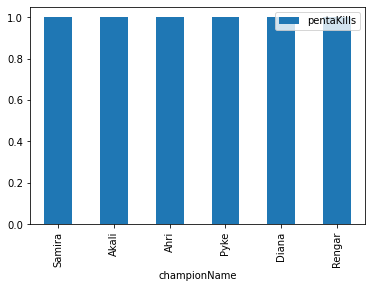

In [25]:
# champions which got a pentaKill
df5 = df5[df5['pentaKills'] > 0]
df5.plot(kind='bar',x='championName',y='pentaKills')

In [26]:
# Building a dataframe that can fit the decisiontreeclassifier model
# The decisiontreeclassifier model only accepts numerical input
# therefore string inputs such as champion names cannot be used

# To get around this problem, I am using a method called one-hot-encoding 
# So by using this method instead of having 10 columns with champions names as string values
# there are 159 champions in the game and 2 teams (red/blue)
# Therefore 318 columns can represent the champions picked by blue team and red team combined
# 0 representing champion not picked, and 1 representing champion picked
w, h = 0, 0
# for x in matches:
#     h = h + 1
#     for y in x:
#         w = w + 1
# w = w//h
h = len(matches)
w = 2 * len(champlist)
# win/lose
w = w + 1
# vision score - difference between vision scores of both teams
w = w + 1
# gold difference 
w = w + 1

Matrix = [[0 for x in range(w)] for y in range(h)]

for xidx, xval in enumerate(matches):
    for idx, val in enumerate(xval):
        for cidx, cval in enumerate(champlist):
            if val['championName']==cval:
                if idx<5:
                    Matrix[xidx][cidx] = 1
                    Matrix[xidx][w-2] = Matrix[xidx][w-2] + val['visionScore']
                    Matrix[xidx][w-3] = Matrix[xidx][w-3] + val['goldEarned']
                else:
                    Matrix[xidx][cidx+len(champlist)] = 1
                    Matrix[xidx][w-2] = Matrix[xidx][w-2] - val['visionScore']
                    Matrix[xidx][w-3] = Matrix[xidx][w-3] - val['goldEarned']
        if idx == 0:
            Matrix[xidx][w-1] = val['win']
df4 = pd.DataFrame(Matrix)
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-2952,-20,False
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6395,8,True
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17777,7,True
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8372,27,True
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [74]:
# columns 0-317 represent the champions picked by red and blue team - 159 champions in the game. 0 = not picked| 1 = picked
# column 318 represents the gold difference between teams
# column 319 represents the vision difference between teams
# column 320 represents win/lose for the blue team

X = df4.drop(columns=[318,319,320])
y = df4[320]

# 80% of the data is allocated to the training set and 20% is allocated to the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score
# With just the champions picked by both teams alone the model is only able to predict with an accuracy of ~50%
# Our dataset of 600 matches is probably too small for the model to accurately learn which team compositions are good
# not to mention there are 150+ different champions in the game

0.53

In [141]:
# only vision score is provided
def droprange():
    arr = []
    arr.append(320)
    for i in range(319):
        arr.append(i)
    return arr

X = df4.drop(columns=droprange())
y = df4[320]

# 80% of the data is allocated to the training set and 20% is allocated to the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score
# this shows how vision score plays an important role in winning the game with a ~70% accuracy

0.73

In [136]:
# only gold difference is provided
def droprange():
    arr = []
    arr.append(320)
    arr.append(319)
    for i in range(318):
        arr.append(i)
    return arr

X = df4.drop(columns=droprange())
y = df4[320]

# 80% of the data is allocated to the training set and 20% is allocated to the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score
# gold difference is an obvious indicator of the winning team with a ~95% accuracy 

0.93